# Задание

> Основная задача:

**Зарегистрируйтесь на платформе Kaggle и скачайте набор данных, и по образцу создайте нейронную сеть. Выведите матрицу ошибок и постарайтесь минимизировать их, подобрав параметры нейронной сети.**

План решения:

1. Загрузите данные с площадки Kaggle.

2. Подготавливаем данные (приводим их к нужным типам данных, проводим базовое EDA, делаем  выводы, если возможно).

3. Создаем тренировочную и валидационную выборки.

4. Масштабируем данные известными вам методами из библиотеки Scikit-learn.

5. Создайте функцию, при вызове которой будет собираться и компилироваться (model.compile) архитектура модели. Функция должна возвращать собранную архитектуру. Параметры слоев и их количество вы выбираете сами, стараясь добиться наилучшего качества.

6. Обучите модель.

7. Оцените качество модели по выбранной вами метрике (выбор метрики должен быть обоснован).

8. Постройте графики точности и графики ошибки в зависимости от количества эпох для тренировочной выборки и для валидационной.

9. Постройте матрицу ошибок для валидационной выборки.

> ЗАДАНИЕ ПРО (Не обязательно к выполнению):

**Оптимизируйте параметры модели в автоматическом режиме. Можно использовать алгоритмы оптимизации типа GridSearch, но не сильно увлекаясь — иначе расчёт может быть излишне долог.**

1. Установите библиотеку scikeras, либо найдите как импортировать модуль KerasRegressor в tensorflow.

2. Из этой же библиотеки scikeras импортируйте модуль KerasRegressor (найдите в документации как его импортировать).

3. Поместите вашу модель в оболочку KerasRegressor.

4. Подберите оптимальные параметры для модели с помощью GridSearchCV или RandomizedSearchCV.

5. Посчитайте метрику с наилучшими параметрами, напишите наилучшие параметры для модели в выводе.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Flatten, MaxPooling1D
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from keras import utils
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

<div class="alert alert-info">
    
# Об этом файле
Этот набор данных описывает медицинские записи индейцев племени Пима
и то, будет ли у каждого пациента развитие диабета в течение 5 лет.
Далее следует описание полей:

* preg = Количество беременностей

* plas = концентрация глюкозы в плазме крови через 2 часа при пероральном тесте на толерантность к глюкозе

* pres = диастолическое артериальное давление (мм рт.ст.)

* skin = Толщина кожной складки на трицепсе (мм)

* test = 2-часовой сывороточный инсулин (млн ед/мл)

* mass = Индекс массы тела (вес в кг/(рост в м)^2)

* pedi = Функция родословной диабета

* age = Возраст (годы)

* class = переменная класса (1: положительный результат теста на диабет, 0: отрицательный результат теста на диабет)

<div class="alert alert-info">
1. Загрузите данные с площадки Kaggle

In [2]:
df = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


**Переименуем колонки для удобства**

In [4]:
df.rename(columns={'6':'preg', '148':'plas', '72':'pres', '35':'skin', '0':'test', '33.6':'mass', '0.627':'pedi', '50':'age', '1':'class'}, inplace=True)

In [5]:
df.sample(5)

,preg,plas,pres,skin,test,mass,pedi,age,class
66,2,109,92,0,0,42.7,0.845,54,0
740,3,102,44,20,94,30.8,0.400,26,0
760,9,170,74,31,0,44.0,0.403,43,1
428,1,95,82,25,180,35.0,0.233,43,1
55,7,187,68,39,304,37.7,0.254,41,1


<div class="alert alert-info">
2. Подготавливаем данные (приводим их к нужным типам данных, проводим базовое EDA, делаем выводы, если возможно).

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    767 non-null    int64  
 1   plas    767 non-null    int64  
 2   pres    767 non-null    int64  
 3   skin    767 non-null    int64  
 4   test    767 non-null    int64  
 5   mass    767 non-null    float64
 6   pedi    767 non-null    float64
 7   age     767 non-null    int64  
 8   class   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<div class="alert alert-success">
Все данные у нас количественные. Никаких пропусков не обнаружено

array([[<Axes: title={'center': 'preg'}>,
        <Axes: title={'center': 'plas'}>,
        <Axes: title={'center': 'pres'}>],
       [<Axes: title={'center': 'skin'}>,
        <Axes: title={'center': 'test'}>,
        <Axes: title={'center': 'mass'}>],
       [<Axes: title={'center': 'pedi'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'class'}>]], dtype=object)

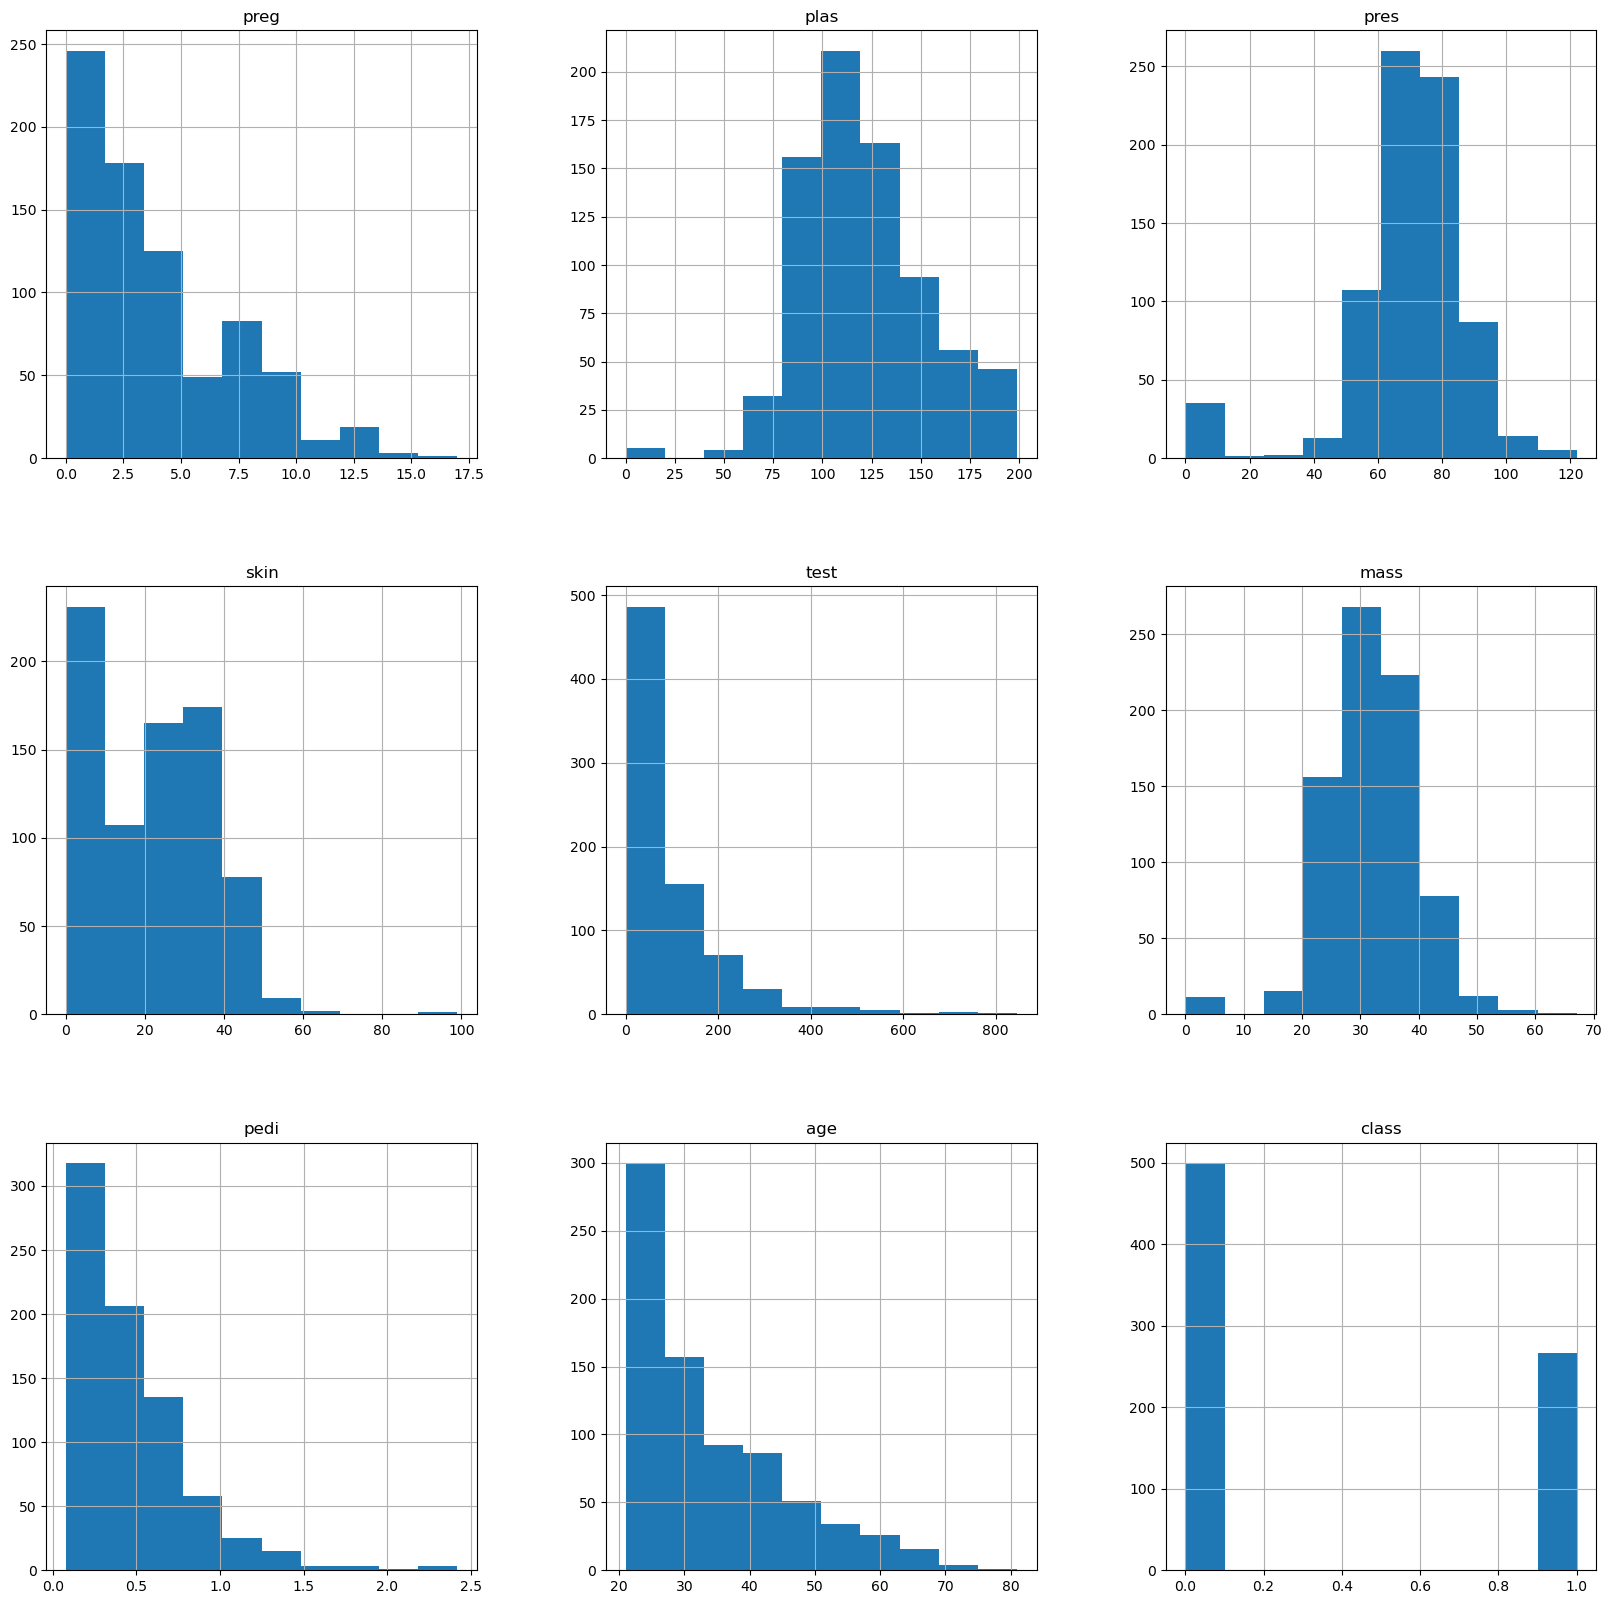

In [7]:
df.hist(figsize=(20, 20))

<div class="alert alert-warning">
Намеки на нормальное распрделение есть только в с концентрацией глюкозы (plas) и с диастолическим артериальным давлением (pres)

In [8]:
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<div class="alert alert-info">
    <b>Выводы</b>
    
- Средний возраст пациента - 32-34 лет
- Средняя концентрация глюкозы - 120.86
- Максимальное количество беременности среди пациентов - 17


</div>

<Axes: >

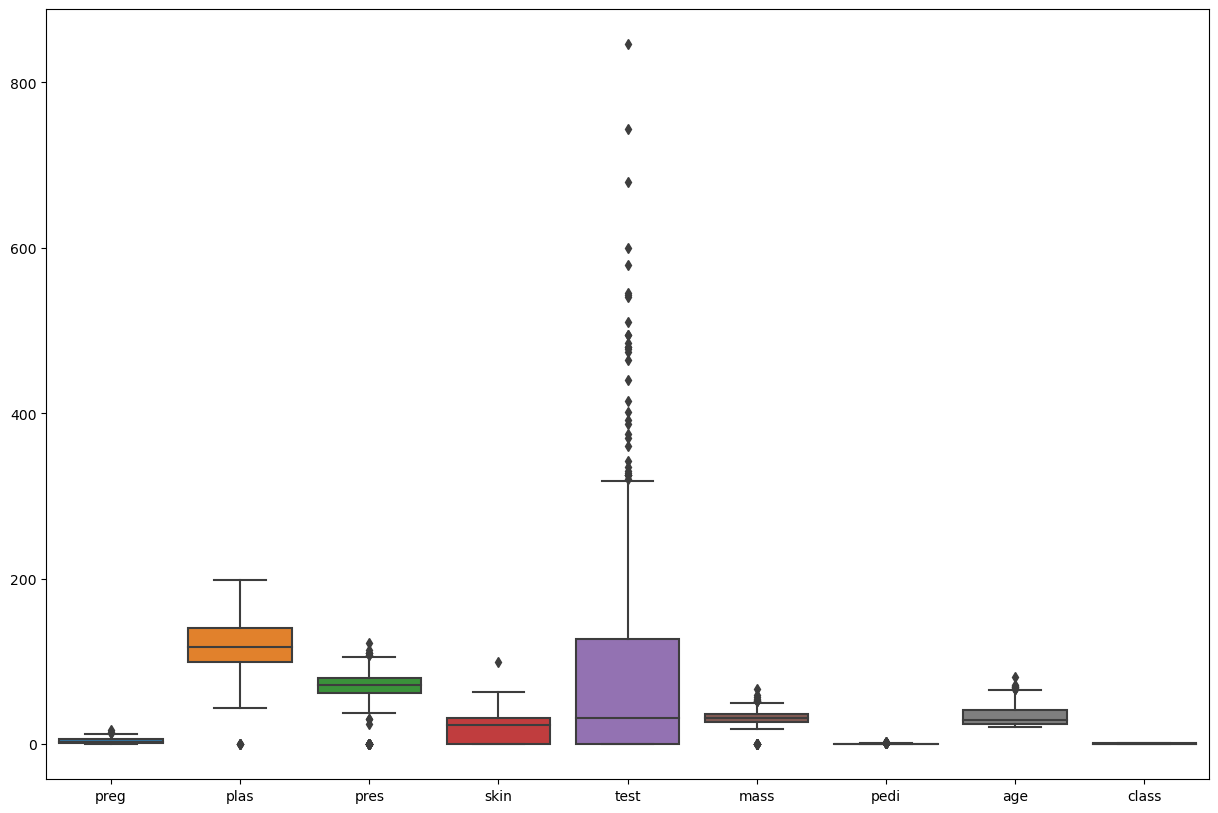

In [9]:
plt.figure(figsize=(15, 10))
sns.boxplot(df)

Большое количество выбросов инсулина, артериальное давление, веса

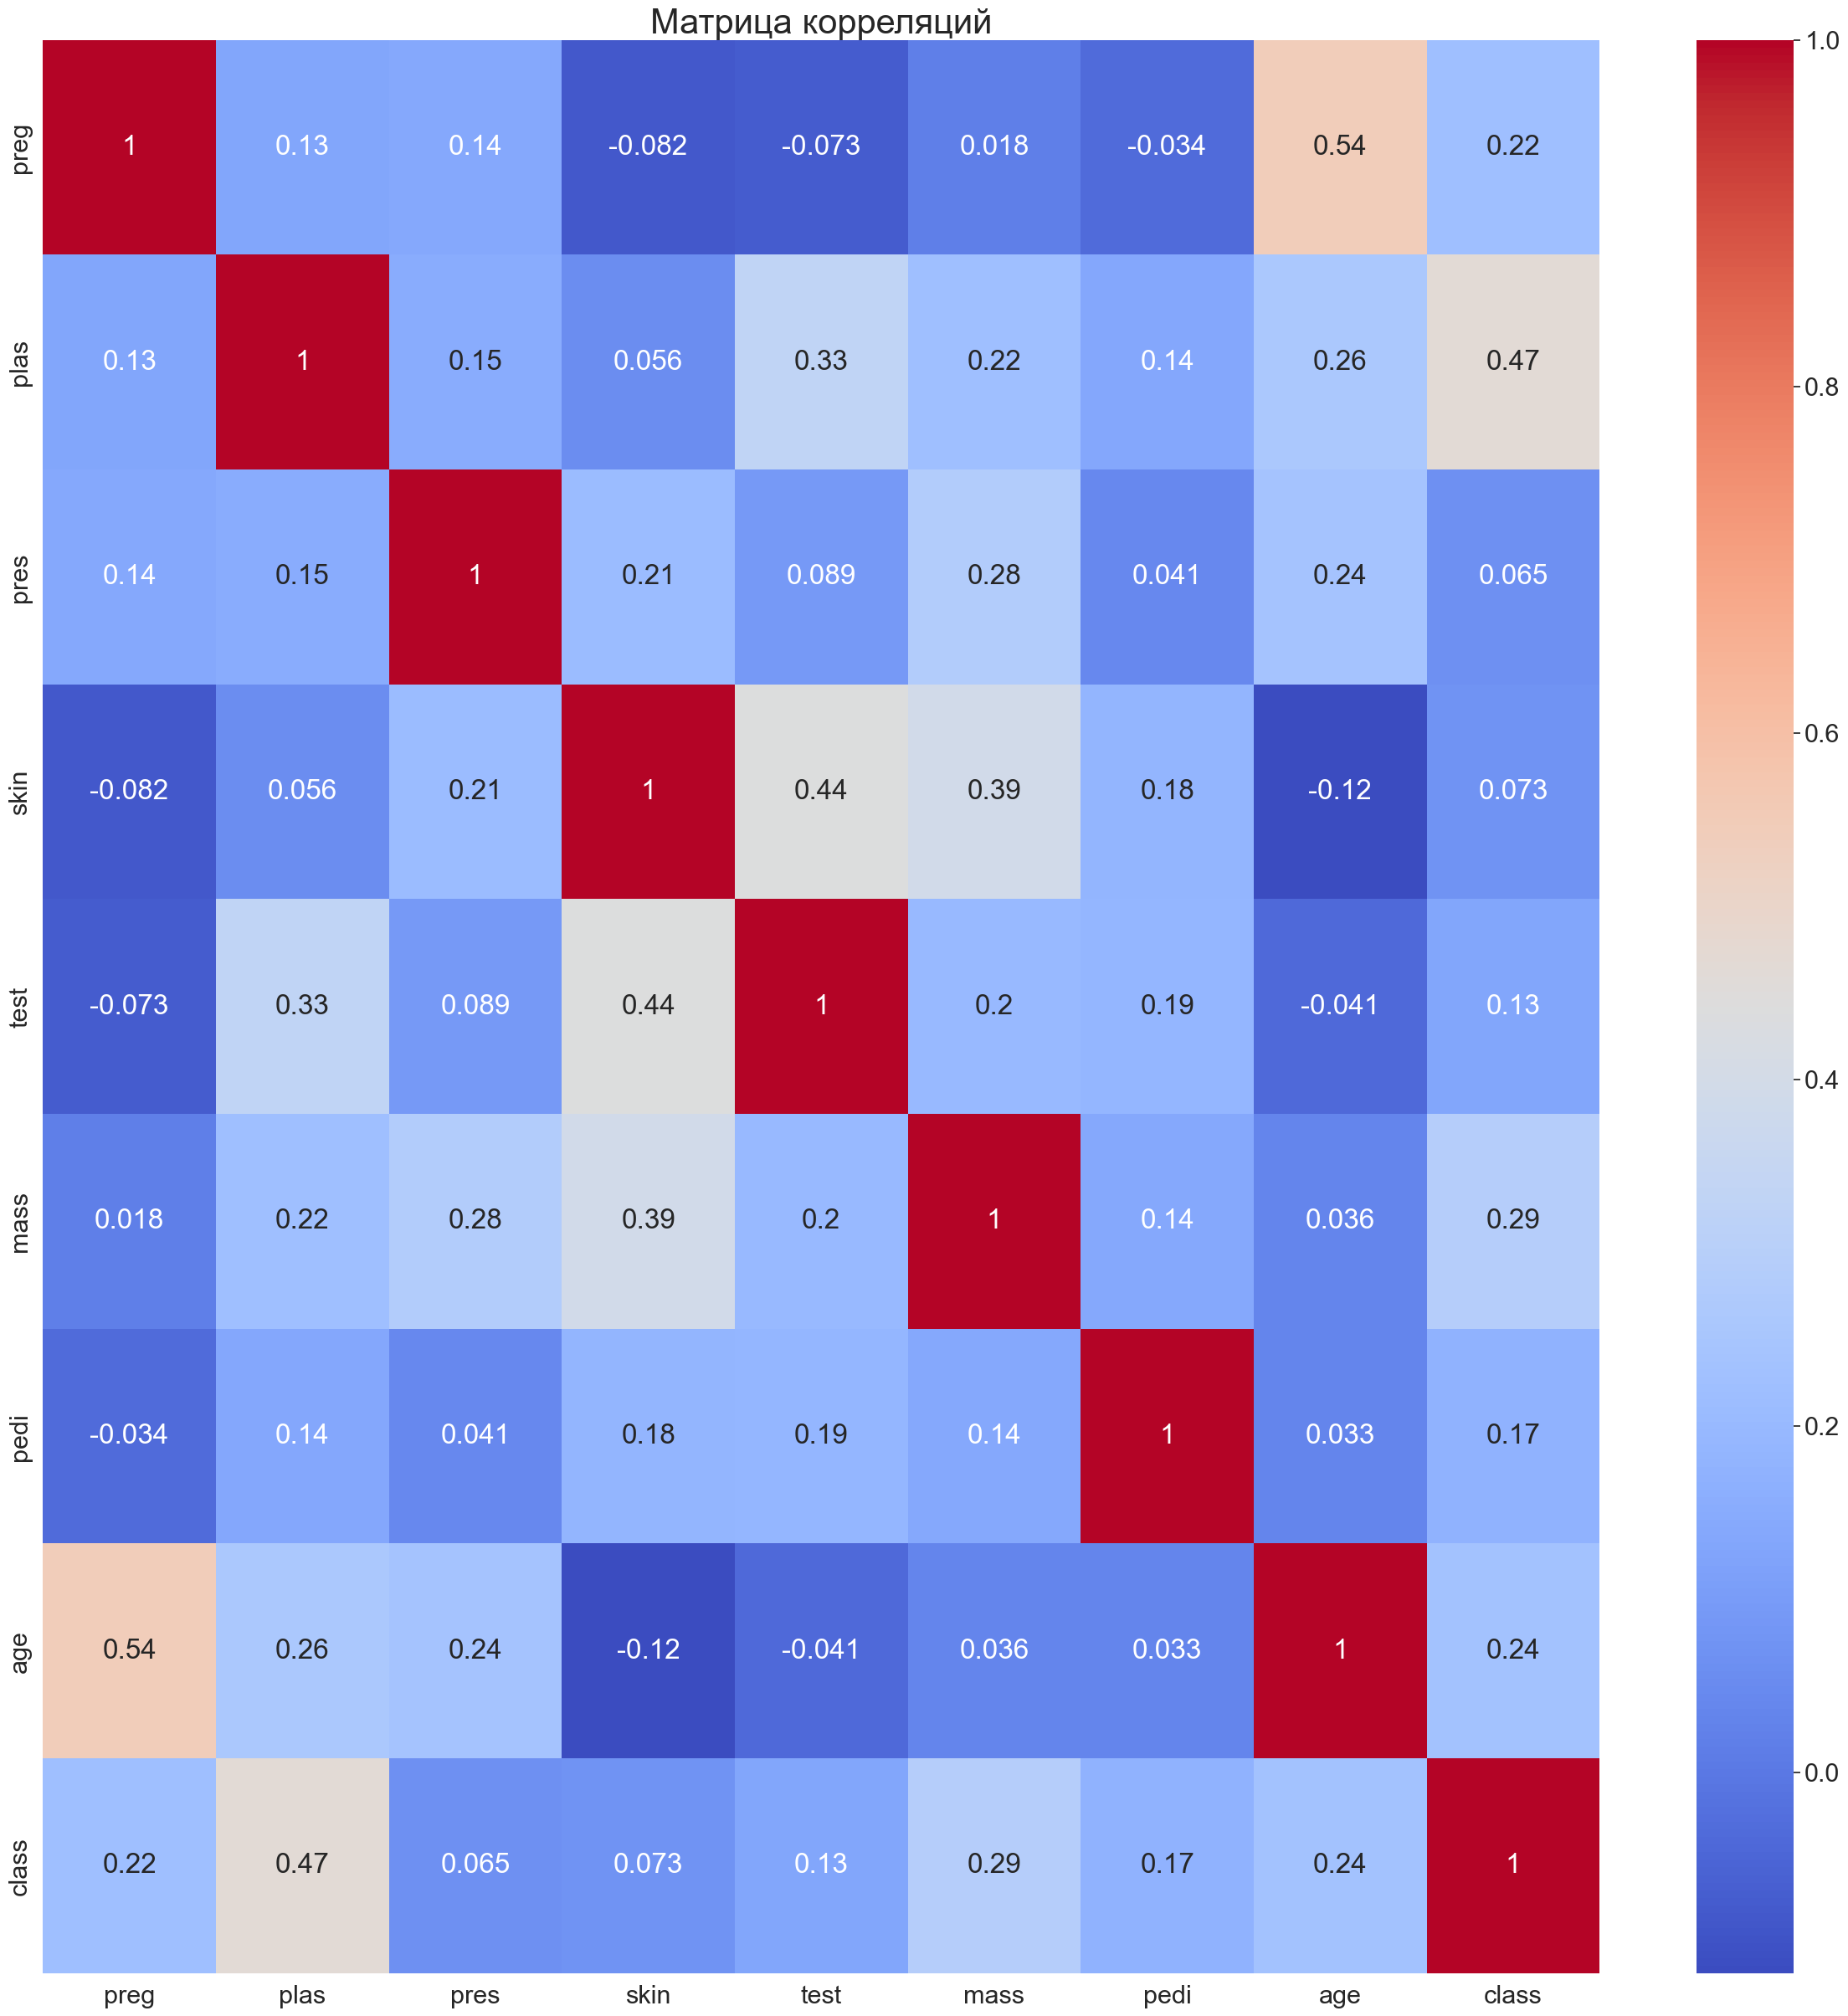

In [10]:
sns.set(font_scale=2)
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=True)
plt.title('Матрица корреляций', fontsize=30);

**Заметная корреляция: (отрицательная)**

1. Количесво беремменостей и ...
* 2-часовой сывороточный инсулин (млн ед/мл)
* Данные кожи

2. Кожи и возраста

<div class="alert alert-info">
3. Создаем тренировочную и валидационную выборки.

In [11]:
features = df.drop(['class'], axis=1)
target = df['class']

In [12]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=12)

In [13]:
features_train.shape, features_test.shape

((536, 8), (231, 8))

In [14]:
target_train.shape, target_test.shape

((536,), (231,))

<div class="alert alert-info">
4. Масштабируем данные известными вам методами из библиотеки Scikit-learn.

In [15]:
scaler = StandardScaler().fit(features_train)
features_train_norm = scaler.transform(features_train)
features_test_norm = scaler.transform(features_test)

<div class="alert alert-info">
5. Создайте функцию, при вызове которой будет собираться и компилироваться (model.compile) архитектура модели. Функция должна возвращать собранную архитектуру. Параметры слоев и их количество вы выбираете сами, стараясь добиться наилучшего качества.

In [16]:
def build_model():
    model = Sequential()
    model.add(Dense(40, input_dim=8, activation='relu'))
    model.add(Dense(80, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(70, activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [17]:
model = build_model() # 8 входных значений, потому что у нас 8 признаков, которые говорят есть у человека диабет или нет
model.summary() # Вывод структуры модели

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                360       
                                                                 
 dense_1 (Dense)             (None, 80)                3280      
                                                                 
 dense_2 (Dense)             (None, 100)               8100      
                                                                 
 dense_3 (Dense)             (None, 70)                7070      
                                                                 
 dense_4 (Dense)             (None, 40)                2840      
                                                                 
 dense_5 (Dense)             (None, 1)                 41        
                                                                 
Total params: 21,691
Trainable params: 21,691
Non-traina

<div class="alert alert-info">
6. Обучите модель.

In [18]:
my_model = model.fit(features_train_norm, target_train, epochs=23, validation_split=0.01, verbose=1)

Epoch 1/23
17/17 [==============================] - 4s 40ms/step - loss: 1.1347 - accuracy: 0.6830 - val_loss: 0.5794 - val_accuracy: 0.6667
Epoch 2/23
17/17 [==============================] - 0s 10ms/step - loss: 0.5467 - accuracy: 0.7321 - val_loss: 0.5934 - val_accuracy: 0.8333
Epoch 3/23
17/17 [==============================] - 0s 10ms/step - loss: 0.5043 - accuracy: 0.7340 - val_loss: 0.5643 - val_accuracy: 0.8333
Epoch 4/23
17/17 [==============================] - 0s 10ms/step - loss: 0.4744 - accuracy: 0.7585 - val_loss: 0.5485 - val_accuracy: 0.6667
Epoch 5/23
17/17 [==============================] - 0s 10ms/step - loss: 0.5013 - accuracy: 0.7736 - val_loss: 0.5569 - val_accuracy: 0.6667
Epoch 6/23
17/17 [==============================] - 0s 10ms/step - loss: 0.4810 - accuracy: 0.7642 - val_loss: 0.5988 - val_accuracy: 0.6667
Epoch 7/23
17/17 [==============================] - 0s 9ms/step - loss: 0.4442 - accuracy: 0.7792 - val_loss: 0.6005 - val_accuracy: 0.6667
Epoch 8/23
17/

<div class="alert alert-info">
7. Оцените качество модели по выбранной вами метрике (выбор метрики должен быть обоснован).

<div style='border:solid blue 2px; padding: 20px'>
    
<br>Будем использовать метрику ROC-AUC (Receiver Operating Characteristic - Area Under Curve) для оценки качества модели в данном случае.<br>

ROC-AUC широко используется для оценки качества моделей классификации, особенно в задачах бинарной классификации, где требуется ранжирование. Она измеряет способность модели правильно классифицировать положительные ответы.

In [19]:
predictions_test = model.predict(features_test_norm)
predictions_train = model.predict(features_train_norm)
print(f"ROC AUC на тренировочной выборке: {roc_auc_score(target_train, predictions_train)}")
print(f"ROC AUC на тестовой выборке: {roc_auc_score(target_test, predictions_test)}")

17/17 [==============================] - 0s 4ms/step
ROC AUC на тренировочной выборке: 0.9725944911067195
ROC AUC на тестовой выборке: 0.8236730706610225


<div class="alert alert-info">
8. Постройте графики точности и графики ошибки в зависимости от количества эпох для тренировочной выборки и для валидационной.

In [20]:
my_model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

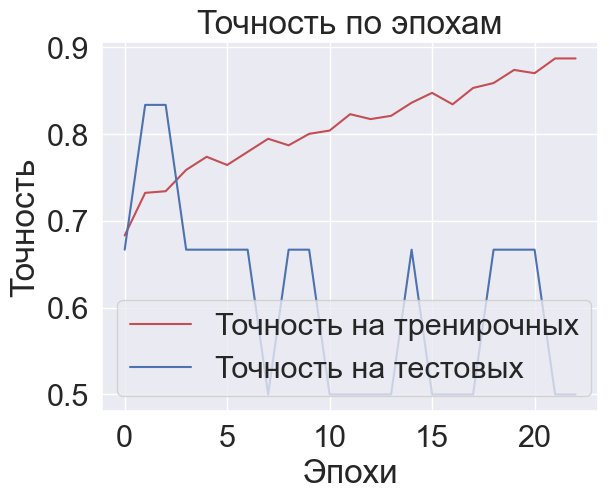

In [21]:
plt.plot(my_model.history['accuracy'], 'r', label='Точность на тренирочных')
plt.plot(my_model.history['val_accuracy'], 'b', label='Точность на тестовых')
plt.title('Точность по эпохам')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()

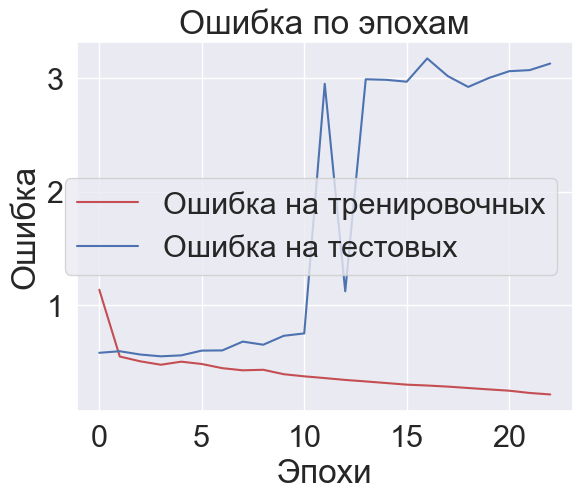

In [22]:
plt.plot(my_model.history['loss'], 'r', label='Ошибка на тренировочных')
plt.plot(my_model.history['val_loss'], 'b', label='Ошибка на тестовых')
plt.title('Ошибка по эпохам')
plt.xlabel('Эпохи')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

<div class="alert alert-info">
9. Постройте матрицу ошибок для валидационной выборки.

In [23]:
predictions_test

array([[ 4.07943785e-01],
       [ 1.13305306e+00],
       [ 4.93073732e-01],
       [ 2.88782209e-01],
       [-6.06112838e-01],
       [ 6.48061037e-01],
       [ 3.41284424e-01],
       [ 2.32263550e-01],
       [-3.14396769e-01],
       [ 7.90001750e-01],
       [ 1.24249980e-01],
       [ 8.60445857e-01],
       [-5.84930927e-02],
       [ 4.10433978e-01],
       [ 2.78975487e-01],
       [ 2.58349657e-01],
       [ 8.21100116e-01],
       [ 1.41638473e-01],
       [ 7.28169322e-01],
       [ 1.05158295e-02],
       [ 5.17470717e-01],
       [ 4.27221388e-01],
       [ 7.19127536e-01],
       [ 6.67518735e-01],
       [-3.05142611e-01],
       [-5.90974763e-02],
       [ 3.37111875e-02],
       [ 2.76340991e-01],
       [-1.20420611e+00],
       [ 2.36953646e-01],
       [-6.96315467e-02],
       [-7.06960917e-01],
       [ 7.57212400e-01],
       [ 5.60625315e-01],
       [ 9.93473291e-01],
       [-9.14297849e-02],
       [ 9.19812679e-01],
       [-2.61281163e-01],
       [ 2.7

In [24]:
target_test

229    1
235    1
749    1
365    1
449    0
      ..
632    0
687    0
537    0
298    0
752    1
Name: class, Length: 231, dtype: int64

In [25]:
predictions_test = np.where(predictions_test >= 0.5 , 1, 0)

In [26]:
predictions_test

array([[0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
    

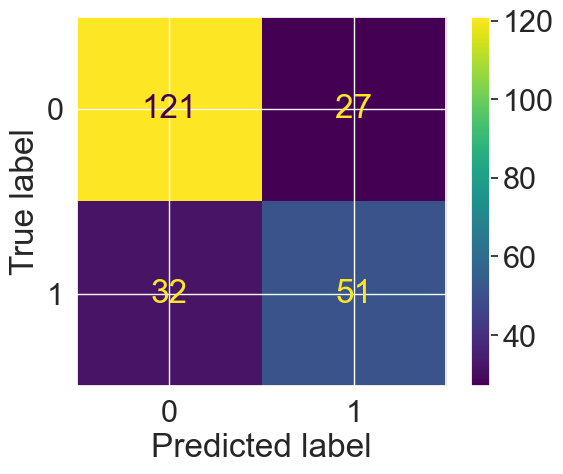

In [27]:
ConfusionMatrixDisplay(confusion_matrix(target_test, predictions_test)).plot()

**Прошу разъяснить что нужно сделал c вектором предсказаний чтобы матрица ошибок была коректной ☝️(Очень хочу исправить)**

<div class="alert alert-info">

# PRO - Задание
1. Установите библиотеку scikeras, либо найдите как импортировать модуль KerasRegressor в tensorflow.

2. Из этой же библиотеки scikeras импортируйте модуль KerasRegressor (найдите в документации как его импортировать).

3. Поместите вашу модель в оболочку KerasRegressor.

4. Подберите оптимальные параметры для модели с помощью GridSearchCV или RandomizedSearchCV.

5. Посчитайте метрику с наилучшими параметрами, напишите наилучшие параметры для модели в выводе.

<div class="alert alert-danger">
Все будет выполненно по пунктам кроме KerasRegressor, потому что выполняющий задание посчитал это опечаткой. 
Потому данные предполагают решение задачи классификации.
Поэтому в задании я использую KerasClassifier.

In [28]:
model = KerasClassifier(build_model, verbose=0)
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 15, 20, 25]
param_grid = dict(batch_size=batch_size, epochs=epochs)

C:\Users\Евгений\AppData\Local\Temp\ipykernel_3784\2442187465.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_model, verbose=0)


In [29]:
# Вновь отмаштабируем признаки
scaler = StandardScaler().fit(features)
features_norm = scaler.transform(features)

In [30]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(features_norm, target)

In [31]:
print(f"Лучшее качество: {grid_result.best_score_} со значениями {grid_result.best_params_}")

Лучшее качество: 0.7602071285247802 со значениями {'batch_size': 40, 'epochs': 15}


<div class="alert alert-success">

# Вывод:
**Самым лучший результат искусственная нейронная сеть показала с количеством образцов данных равным 40 (batch_size) и 15 эпохами обучения.**